In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.base import BaseEstimator, TransformerMixin, OneToOneFeatureMixin
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.inspection import permutation_importance


In [41]:
data = pd.read_csv('../data/space_weather_aligned.csv')

print(data.head()) 
print(data.info())

         BX        BY        BZ       V_SW       N_p     P_dyn     SYM_H  Dst  \
0  1.482712 -3.268983  0.240678  327.05884  7.180588  1.535686 -0.833333  1.0   
1  0.772333 -4.247667 -0.225000  333.42654  5.644286  1.255714 -1.300000  3.0   
2  0.211552 -5.287931 -0.113621  338.35800  4.752000  1.094000 -3.083333  2.0   
3  0.850678 -5.359153 -0.166441  340.48334  5.114074  1.187593 -1.433333  1.0   
4  1.095167 -6.217000  0.926667  349.35715  5.806786  1.417679  0.366667  2.0   

          AE   Kp        xray_A        xray_B  flare_intensity  
0  32.833333  0.0  1.180593e-09  8.210337e-08        -7.092657  
1  29.800000  0.0  1.150896e-09  6.274009e-08        -7.204111  
2  25.050000  0.0  1.056184e-09  5.368431e-08        -7.271861  
3  20.883333  1.0  1.019183e-09  5.470959e-08        -7.264323  
4  28.416667  1.0  1.019778e-09  5.446325e-08        -7.269557  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5041 entries, 0 to 5040
Data columns (total 13 columns):
 #   Column     

In [42]:
data.describe()

,BX,BY,BZ,V_SW,N_p,P_dyn,SYM_H,Dst,AE,Kp,xray_A,xray_B,flare_intensity
count,4880.000000,4880.000000,4880.000000,4879.000000,4879.000000,4879.000000,5041.000000,5040.000000,5040.000000,5041.000000,5.041000e+03,5.041000e+03,5041.000000
mean,0.527764,-0.361471,0.050166,403.513775,5.980046,1.726350,-8.526708,-8.735516,104.990304,1.271242,-1.319170e+03,-1.319170e+03,-6.830829
std,2.682275,3.171779,2.243638,88.154979,5.014815,1.218013,11.845821,11.758809,132.355120,1.091050,8.208840e+03,8.208840e+03,0.497600
min,-10.855000,-12.914915,-14.460169,257.212770,0.470800,0.163200,-88.483333,-88.000000,6.233333,0.000000,-9.499905e+04,-9.499905e+04,-10.590143
25%,-1.454400,-2.416208,-1.131922,336.353275,2.960229,1.043856,-13.816667,-14.000000,28.516667,0.333333,1.032192e-09,7.605156e-08,-7.097999
50%,0.785390,-0.762368,0.022583,380.438600,4.607931,1.413725,-7.166667,-8.000000,51.625000,1.000000,1.143783e-09,1.244731e-07,-6.900847
75%,2.489554,1.807425,1.246787,454.066465,7.099989,2.060495,-1.450000,-1.000000,128.537500,2.000000,2.082390e-09,2.345989e-07,-6.627530
max,13.956271,23.443275,19.926142,691.412900,63.376667,21.111168,50.683333,51.000000,1461.333333,5.666667,9.929595e-06,4.342338e-05,-4.540368


In [43]:
data.isna().sum()

BX                 161
BY                 161
BZ                 161
V_SW               162
N_p                162
P_dyn              162
SYM_H                0
Dst                  1
AE                   1
Kp                   0
xray_A               0
xray_B               0
flare_intensity      0
dtype: int64

In [44]:
data.dtypes

BX                 float64
BY                 float64
BZ                 float64
V_SW               float64
N_p                float64
P_dyn              float64
SYM_H              float64
Dst                float64
AE                 float64
Kp                 float64
xray_A             float64
xray_B             float64
flare_intensity    float64
dtype: object

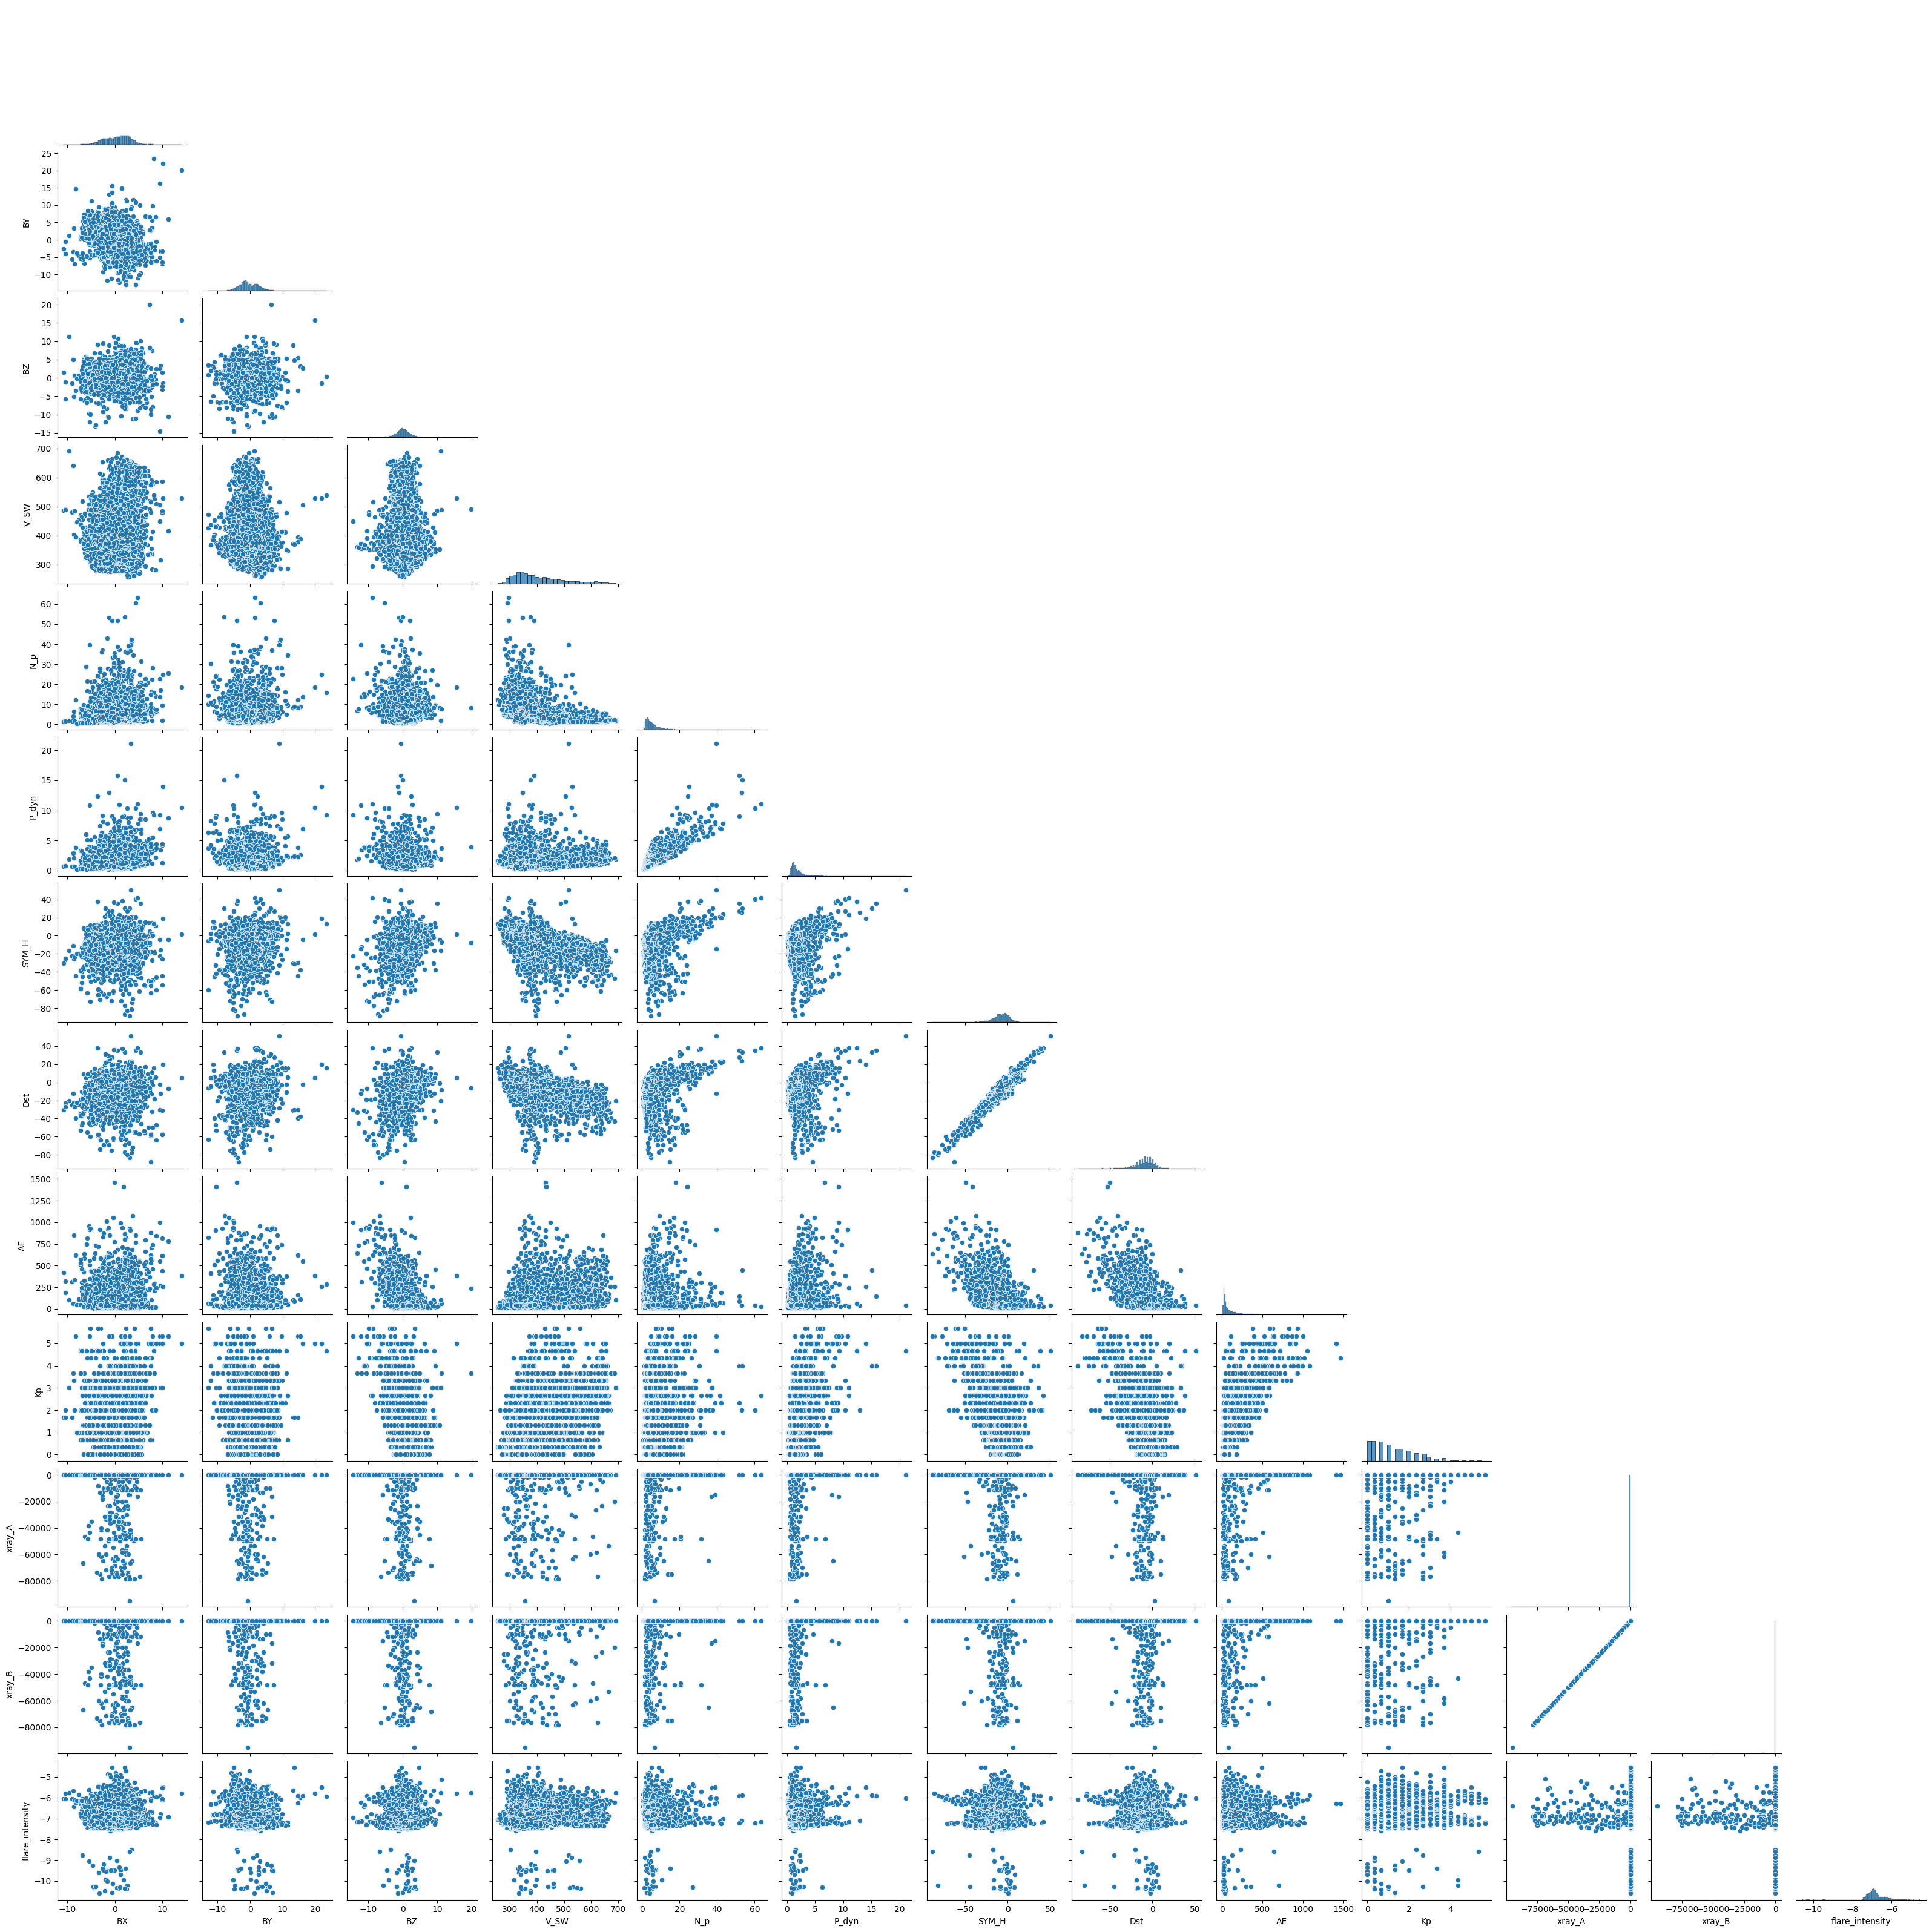

In [45]:
sns.pairplot(data, corner=True)

In [46]:
data_interpolated = data.interpolate(method='pchip')

data_interpolated.isna().sum()

BX                 0
BY                 0
BZ                 0
V_SW               0
N_p                0
P_dyn              0
SYM_H              0
Dst                0
AE                 0
Kp                 0
xray_A             0
xray_B             0
flare_intensity    0
dtype: int64

In [47]:
data.describe()

,BX,BY,BZ,V_SW,N_p,P_dyn,SYM_H,Dst,AE,Kp,xray_A,xray_B,flare_intensity
count,4880.000000,4880.000000,4880.000000,4879.000000,4879.000000,4879.000000,5041.000000,5040.000000,5040.000000,5041.000000,5.041000e+03,5.041000e+03,5041.000000
mean,0.527764,-0.361471,0.050166,403.513775,5.980046,1.726350,-8.526708,-8.735516,104.990304,1.271242,-1.319170e+03,-1.319170e+03,-6.830829
std,2.682275,3.171779,2.243638,88.154979,5.014815,1.218013,11.845821,11.758809,132.355120,1.091050,8.208840e+03,8.208840e+03,0.497600
min,-10.855000,-12.914915,-14.460169,257.212770,0.470800,0.163200,-88.483333,-88.000000,6.233333,0.000000,-9.499905e+04,-9.499905e+04,-10.590143
25%,-1.454400,-2.416208,-1.131922,336.353275,2.960229,1.043856,-13.816667,-14.000000,28.516667,0.333333,1.032192e-09,7.605156e-08,-7.097999
50%,0.785390,-0.762368,0.022583,380.438600,4.607931,1.413725,-7.166667,-8.000000,51.625000,1.000000,1.143783e-09,1.244731e-07,-6.900847
75%,2.489554,1.807425,1.246787,454.066465,7.099989,2.060495,-1.450000,-1.000000,128.537500,2.000000,2.082390e-09,2.345989e-07,-6.627530
max,13.956271,23.443275,19.926142,691.412900,63.376667,21.111168,50.683333,51.000000,1461.333333,5.666667,9.929595e-06,4.342338e-05,-4.540368


In [48]:
data_interpolated.describe()

,BX,BY,BZ,V_SW,N_p,P_dyn,SYM_H,Dst,AE,Kp,xray_A,xray_B,flare_intensity
count,5041.000000,5041.000000,5041.000000,5041.000000,5041.000000,5041.000000,5041.000000,5041.000000,5041.000000,5041.000000,5.041000e+03,5.041000e+03,5041.000000
mean,0.486930,-0.340982,0.044828,402.973354,5.955113,1.717682,-8.526708,-8.726774,105.009552,1.271242,-1.319170e+03,-1.319170e+03,-6.830829
std,2.700196,3.169441,2.230446,87.518915,4.969021,1.207178,11.845821,11.774014,132.349044,1.091050,8.208840e+03,8.208840e+03,0.497600
min,-10.855000,-12.914915,-14.460169,257.212770,0.470800,0.163200,-88.483333,-88.000000,6.233333,0.000000,-9.499905e+04,-9.499905e+04,-10.590143
25%,-1.509833,-2.408036,-1.127833,336.858340,2.964510,1.041351,-13.816667,-14.000000,28.516667,0.333333,1.032192e-09,7.605156e-08,-7.097999
50%,0.737037,-0.725763,0.017167,380.002230,4.586792,1.403750,-7.166667,-8.000000,51.633333,1.000000,1.143783e-09,1.244731e-07,-6.900847
75%,2.477333,1.829000,1.235500,453.426670,7.067714,2.052558,-1.450000,-1.000000,128.550000,2.000000,2.082390e-09,2.345989e-07,-6.627530
max,13.956271,23.443275,19.926142,691.412900,63.376667,21.111168,50.683333,51.000000,1461.333333,5.666667,9.929595e-06,4.342338e-05,-4.540368


<Axes: >

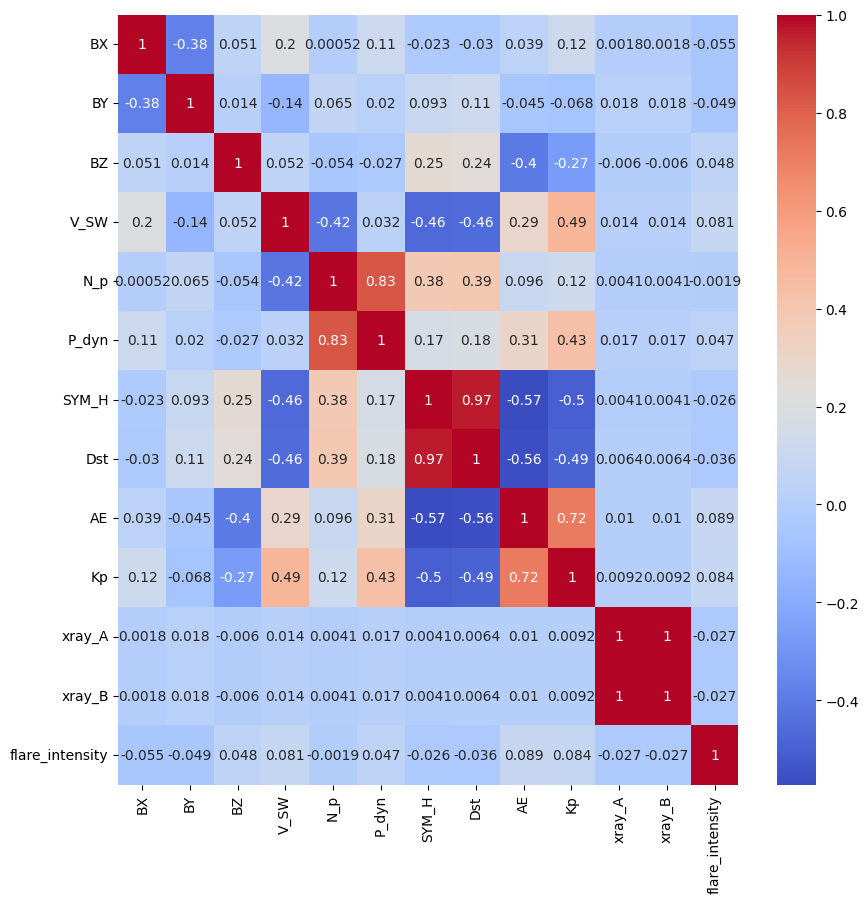

In [49]:
correlation = data_interpolated.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

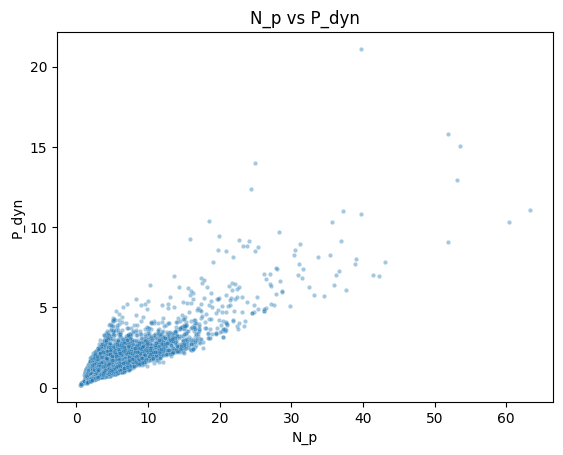

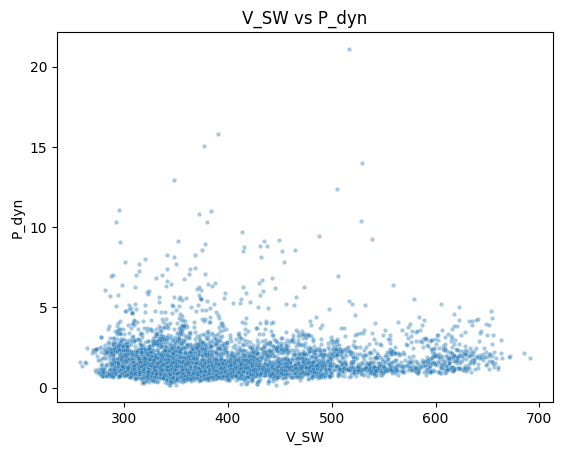

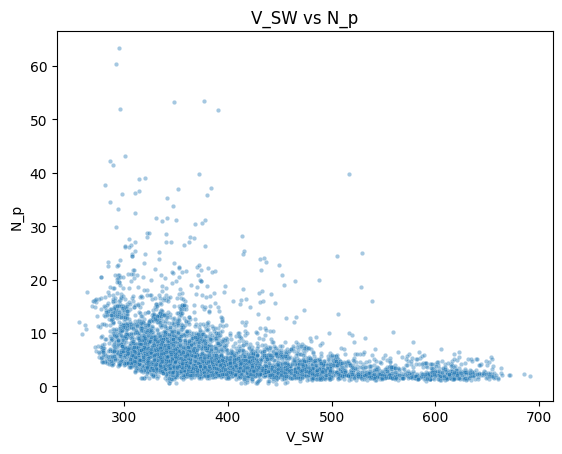

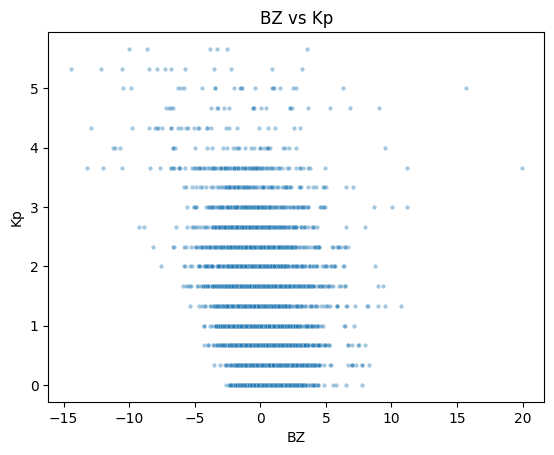

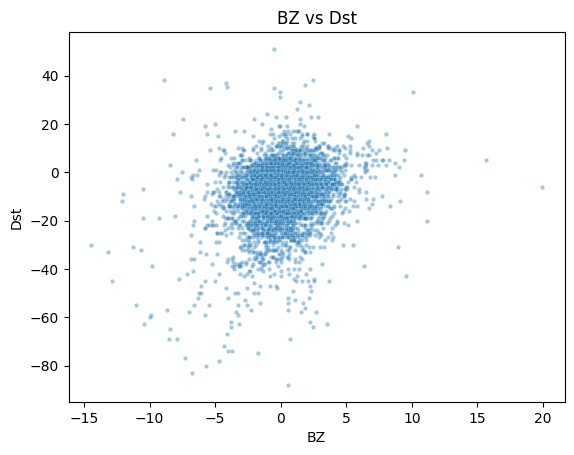

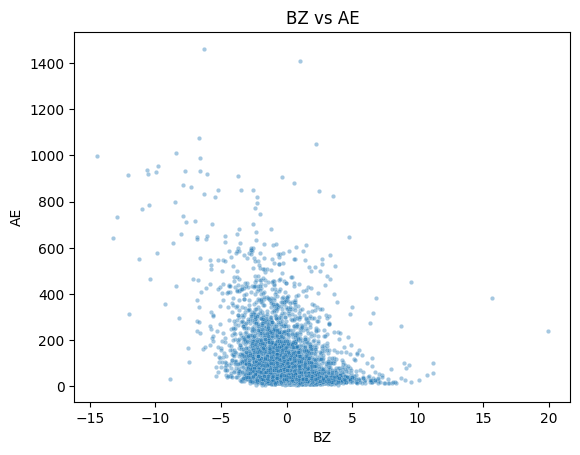

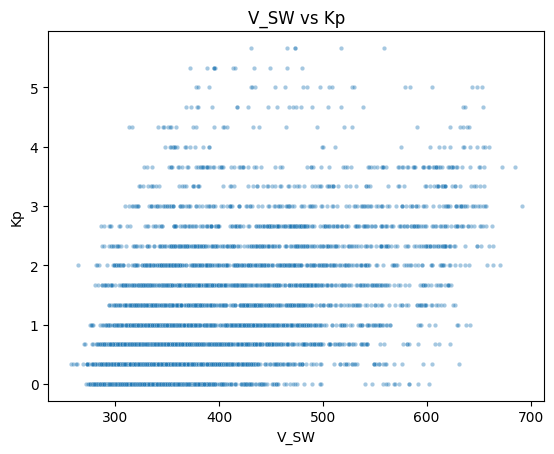

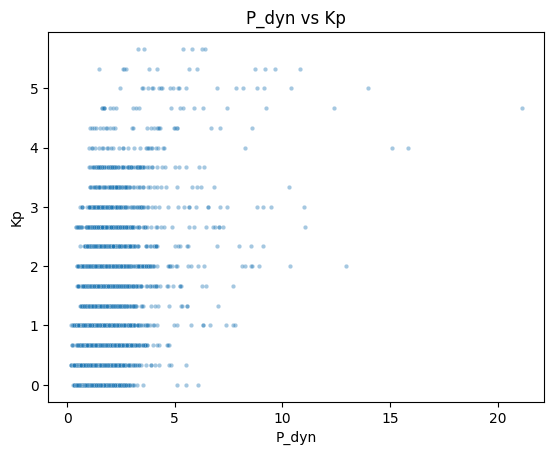

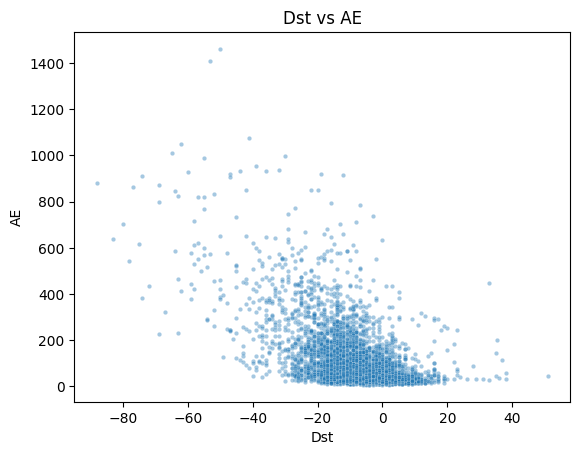

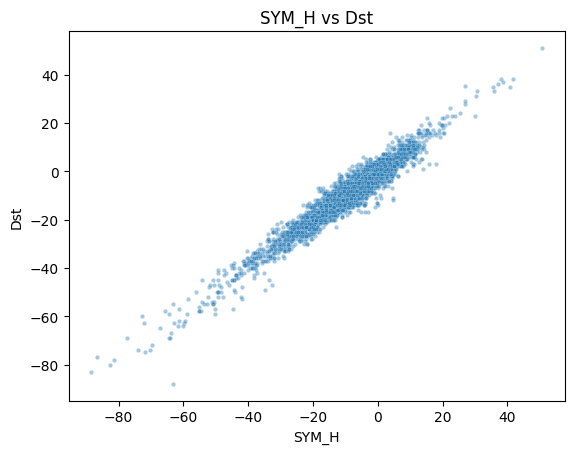

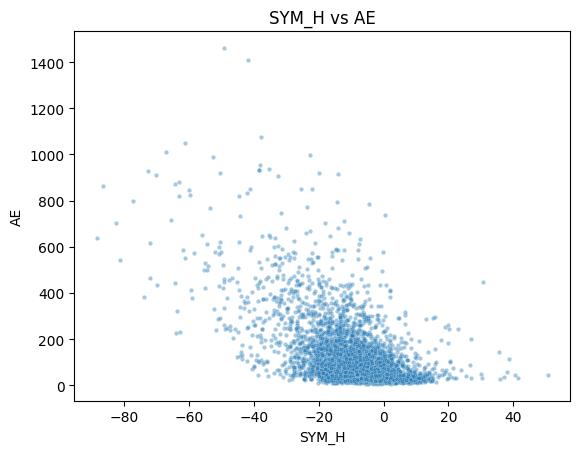

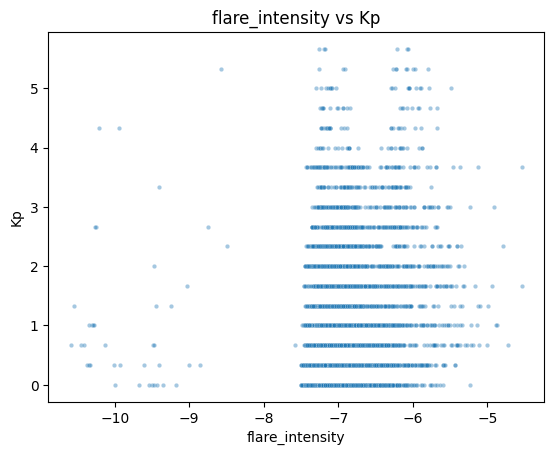

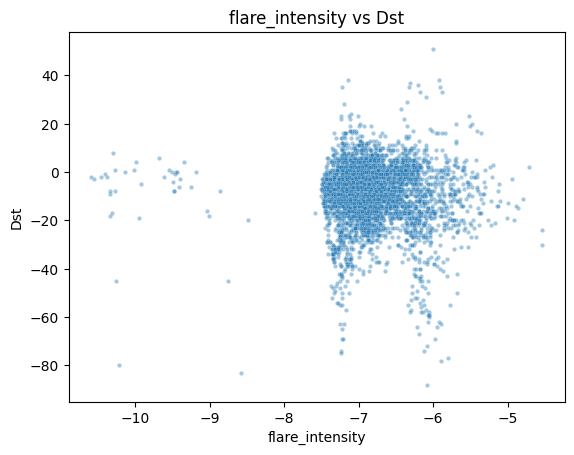

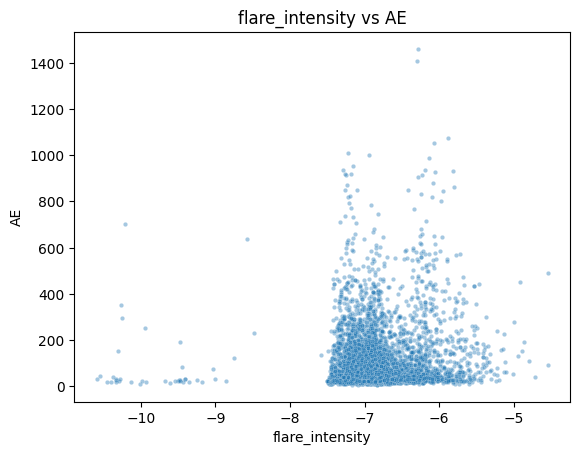

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

pairs = [
    ("N_p", "P_dyn"),
    ("V_SW", "P_dyn"),
    ("V_SW", "N_p"),
    ("BZ", "Kp"),
    ("BZ", "Dst"),
    ("BZ", "AE"),
    ("V_SW", "Kp"),
    ("P_dyn", "Kp"),
    ("Dst", "AE"),
    ("SYM_H", "Dst"),
    ("SYM_H", "AE"),
    ("flare_intensity", "Kp"),
    ("flare_intensity", "Dst"),
    ("flare_intensity", "AE"),
]

for x, y in pairs:
    sns.scatterplot(data=data_interpolated, x=x, y=y, s=10, alpha=0.4)
    plt.title(f"{x} vs {y}")
    plt.show()


In [ ]:
data["Bz_neg"] = data["BZ"].clip(upper=0)

data["Bz_int_6h"] = data["Bz_neg"].rolling(window=6, min_periods=1).sum()

data["VBz"] = data["V_SW"] * data["Bz_neg"].abs()
data["VBz_int_6h"] = data["VBz"].rolling(window=6, min_periods=1).sum()

data["dP_dyn"] = data["P_dyn"].diff()

data["dV_SW"] = data["V_SW"].diff()

for lag in [1, 3, 6]:
    data[f"BZ_lag{lag}"] = data["BZ"].shift(lag)
    data[f"V_SW_lag{lag}"] = data["V_SW"].shift(lag)
    data[f"P_dyn_lag{lag}"] = data["P_dyn"].shift(lag)

In [53]:
n = len(data)
train = data.iloc[: int(0.6*n)]
val = data.iloc[int(0.6*n) : int(0.8*n)]
test= data.iloc[int(0.8*n) :]


In [ ]:
for df in [train, val, test]:
    df["storm_next_12h"] = (
        df["Kp"]
        .rolling(window=12, min_periods=1)
        .max()
        .shift(-11)
        >= 5
    ).astype(int)


In [ ]:

X_cols = [
    col for col in data.columns
    if col not in ["Kp", "storm_next_12h"]
]

X_train = train[X_cols]
y_train = train["storm_next_12h"]
X_val = val[X_cols]
y_val = val["storm_next_12h"]
X_test = test[X_cols]
y_test = test["storm_next_12h"]

